In [1]:
# ============================
# 1. Import Library
# ============================

# Library untuk manipulasi data
import pandas as pd
import numpy as np

# Library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Library model KNN
from sklearn.neighbors import KNeighborsClassifier

# Library evaluasi model
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score
)


In [2]:
# ============================
# 2. Memuat dan Memeriksa Data
# ============================

# Path file CSV (pakai raw string biar backslash aman)
data_path = r"C:\Users\Rahayu Febrianti\Downloads\KNN_FOREST\forest_health_data_with_target.csv"

# Membaca dataset
df = pd.read_csv(data_path)

# Melihat 5 baris pertama
print("===== 5 Baris Pertama Data =====")
display(df.head())

# Melihat bentuk (jumlah baris dan kolom)
print("\n===== Shape Data =====")
print(df.shape)

# Informasi tipe data tiap kolom dan jumlah non-null
print("\n===== Info Data =====")
print(df.info())

# Statistik deskriptif untuk kolom numerik
print("\n===== Statistik Deskriptif (Numerik) =====")
display(df.describe())

# Mengecek jumlah missing values per kolom
print("\n===== Cek Missing Values =====")
print(df.isnull().sum())

# Melihat distribusi kelas pada target Health_Status
print("\n===== Distribusi Kelas Health_Status =====")
print(df['Health_Status'].value_counts())


===== 5 Baris Pertama Data =====


,Plot_ID,Latitude,Longitude,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index,Health_Status
0,1,24.981605,-117.040695,29.862040,20.835684,6.147963,4.542720,29.171563,212.518419,30.209377,93.086241,0.379904,0.268850,0.328882,0.487287,0.682938,2.998681,0.004402,0.812948,Healthy
1,2,48.028572,-92.066934,28.462986,24.307079,8.248891,5.260921,7.757386,641.640332,29.054905,62.028839,0.339583,0.073260,0.044616,0.013501,0.723696,3.986987,0.000330,0.678542,Very Healthy
2,3,39.279758,-68.893791,91.094185,9.013101,7.841448,8.690927,39.257755,2510.612835,8.351397,77.992822,0.184392,0.297665,0.124953,0.474088,2.129934,3.250667,0.472263,0.889075,Healthy
3,4,33.946339,-78.744258,28.706889,19.496475,2.385099,4.060039,27.590231,2323.628233,37.290034,54.883864,0.611194,0.160819,0.387971,0.187495,1.717352,1.333210,0.029294,0.449336,Unhealthy
4,5,16.240746,-73.540720,30.835224,18.008888,2.343245,8.826847,7.074175,1116.863805,24.896527,70.402766,0.481858,0.030913,0.266699,0.009995,2.476038,1.742321,0.974533,0.893890,Unhealthy



===== Shape Data =====
(1000, 20)

===== Info Data =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Plot_ID                  1000 non-null   int64  
 1   Latitude                 1000 non-null   float64
 2   Longitude                1000 non-null   float64
 3   DBH                      1000 non-null   float64
 4   Tree_Height              1000 non-null   float64
 5   Crown_Width_North_South  1000 non-null   float64
 6   Crown_Width_East_West    1000 non-null   float64
 7   Slope                    1000 non-null   float64
 8   Elevation                1000 non-null   float64
 9   Temperature              1000 non-null   float64
 10  Humidity                 1000 non-null   float64
 11  Soil_TN                  1000 non-null   float64
 12  Soil_TP                  1000 non-null   float64
 13  Soil_AP              

,Plot_ID,Latitude,Longitude,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,29.610262,-94.508789,52.728544,15.730501,5.446948,5.486180,22.198898,1498.874791,22.027384,59.743599,0.510635,0.255100,0.251220,0.249344,1.762232,2.963965,0.512124,0.509207
std,288.819436,11.685494,20.453293,27.614049,8.021702,2.581289,2.602753,13.038014,826.251755,9.878208,22.572259,0.283588,0.146605,0.142471,0.145486,0.724376,1.163286,0.287952,0.281458
min,1.000000,10.185281,-129.774722,5.001105,2.018295,1.000276,1.055654,0.064275,100.698914,5.008503,20.004226,0.010934,0.005078,0.005596,0.005660,0.503300,1.001239,0.000252,0.000854
25%,250.750000,19.438931,-113.124801,29.828343,8.773222,3.204766,3.244420,10.809975,784.368948,13.728430,41.131530,0.260105,0.130452,0.127690,0.121242,1.136698,1.947451,0.270524,0.277123
50%,500.500000,29.872295,-93.688627,52.558322,15.559820,5.451383,5.413625,21.808936,1503.573023,21.754533,59.614944,0.511302,0.249754,0.247471,0.243803,1.752412,2.969374,0.523023,0.516489
75%,750.250000,39.772784,-76.767446,77.114835,22.651143,7.659941,7.658666,34.040896,2171.952127,30.056674,78.897379,0.759135,0.387961,0.377836,0.377283,2.421229,3.987144,0.750194,0.746163
max,1000.000000,49.988707,-60.041039,99.792981,29.987616,9.979745,9.994153,44.975731,2996.823629,39.860447,99.960415,0.999676,0.499671,0.499356,0.499428,2.999513,4.999699,0.999150,0.997163



===== Cek Missing Values =====
Plot_ID                    0
Latitude                   0
Longitude                  0
DBH                        0
Tree_Height                0
Crown_Width_North_South    0
Crown_Width_East_West      0
Slope                      0
Elevation                  0
Temperature                0
Humidity                   0
Soil_TN                    0
Soil_TP                    0
Soil_AP                    0
Soil_AN                    0
Menhinick_Index            0
Gleason_Index              0
Disturbance_Level          0
Fire_Risk_Index            0
Health_Status              0
dtype: int64

===== Distribusi Kelas Health_Status =====
Health_Status
Healthy         441
Unhealthy       322
Very Healthy    156
Sub-healthy      81
Name: count, dtype: int64


C:\Users\Rahayu Febrianti\AppData\Local\Temp\ipykernel_1212\1020982730.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Health_Status', palette='viridis')


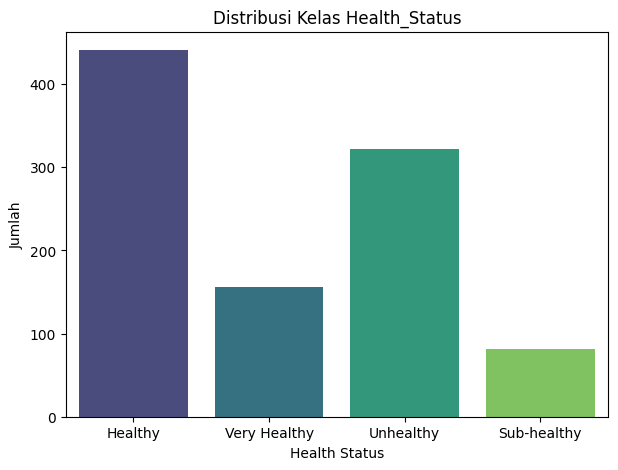

Health_Status
Healthy         441
Unhealthy       322
Very Healthy    156
Sub-healthy      81
Name: count, dtype: int64


In [3]:
# ============================
# Distribusi Kelas Target
# ============================

plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Health_Status', palette='viridis')
plt.title("Distribusi Kelas Health_Status")
plt.xlabel("Health Status")
plt.ylabel("Jumlah")
plt.show()

print(df['Health_Status'].value_counts())


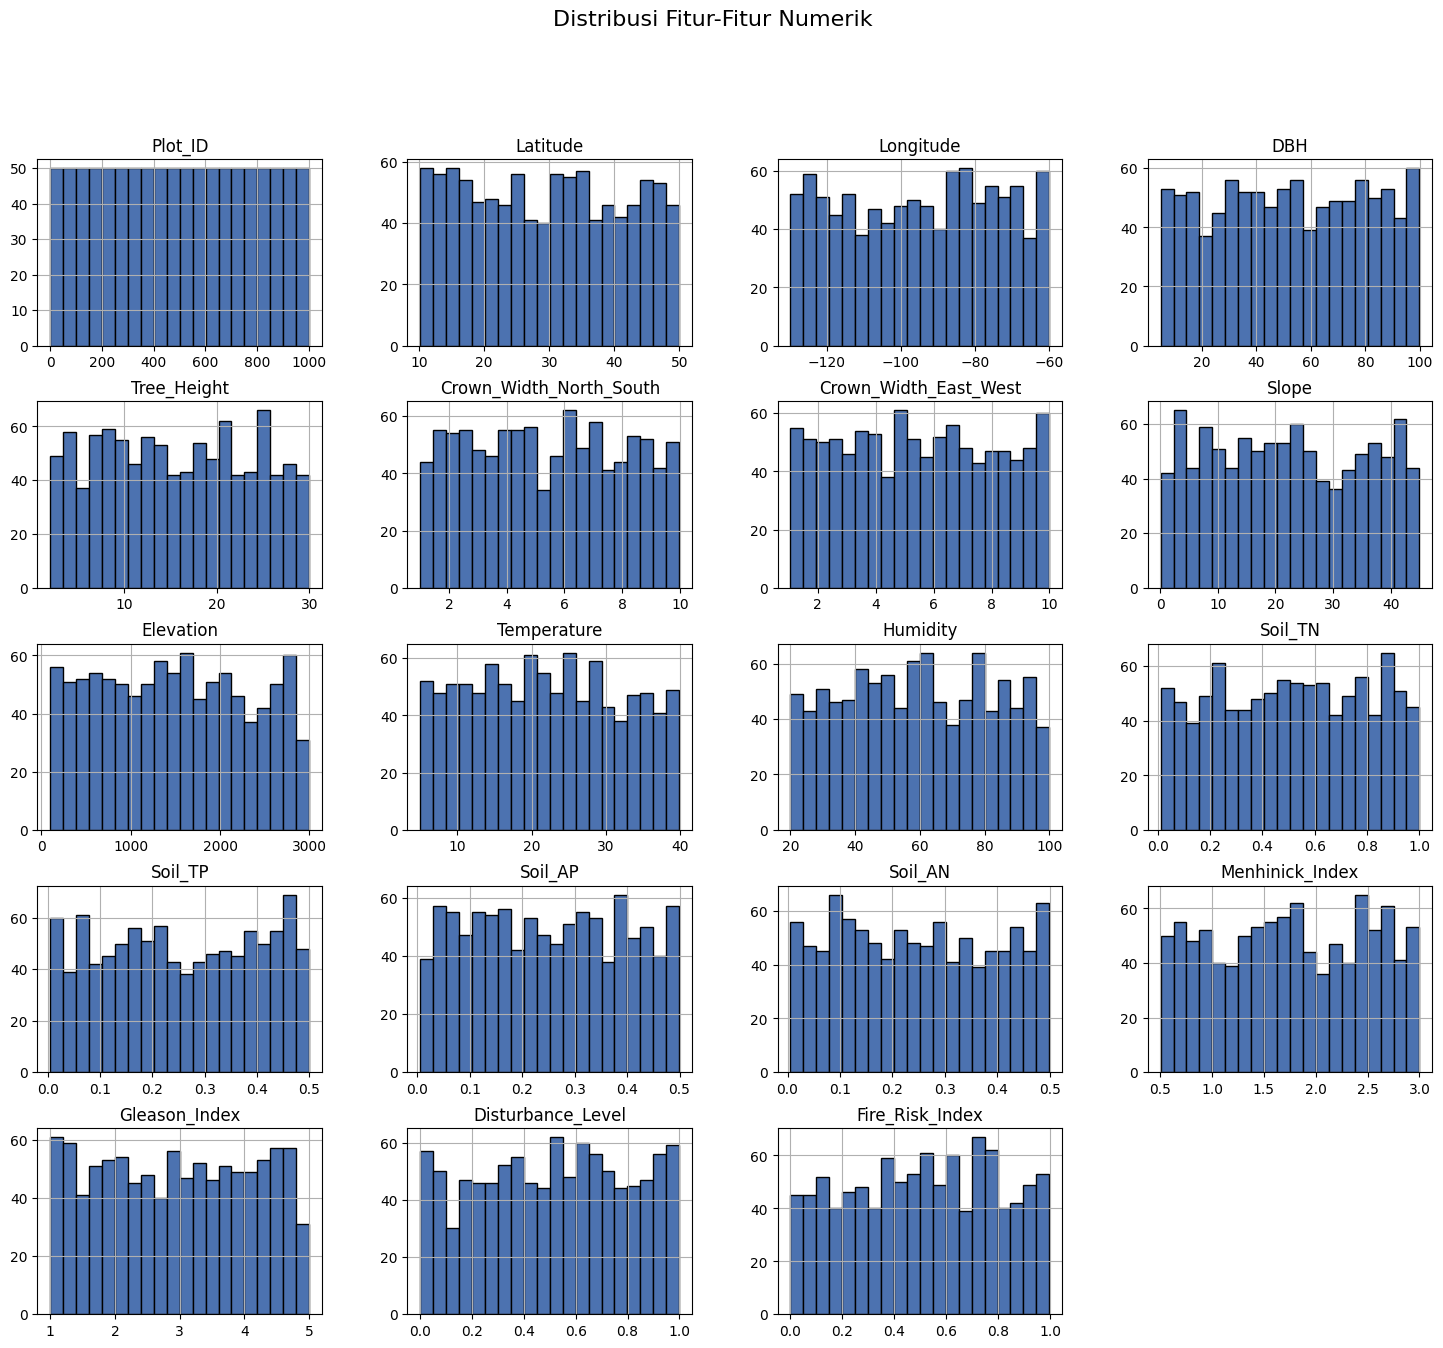

In [4]:
# ============================
# Distribusi Fitur Numerik
# ============================

df.hist(figsize=(18,15), bins=20, color="#4c72b0", edgecolor="black")
plt.suptitle("Distribusi Fitur-Fitur Numerik", fontsize=16)
plt.show()


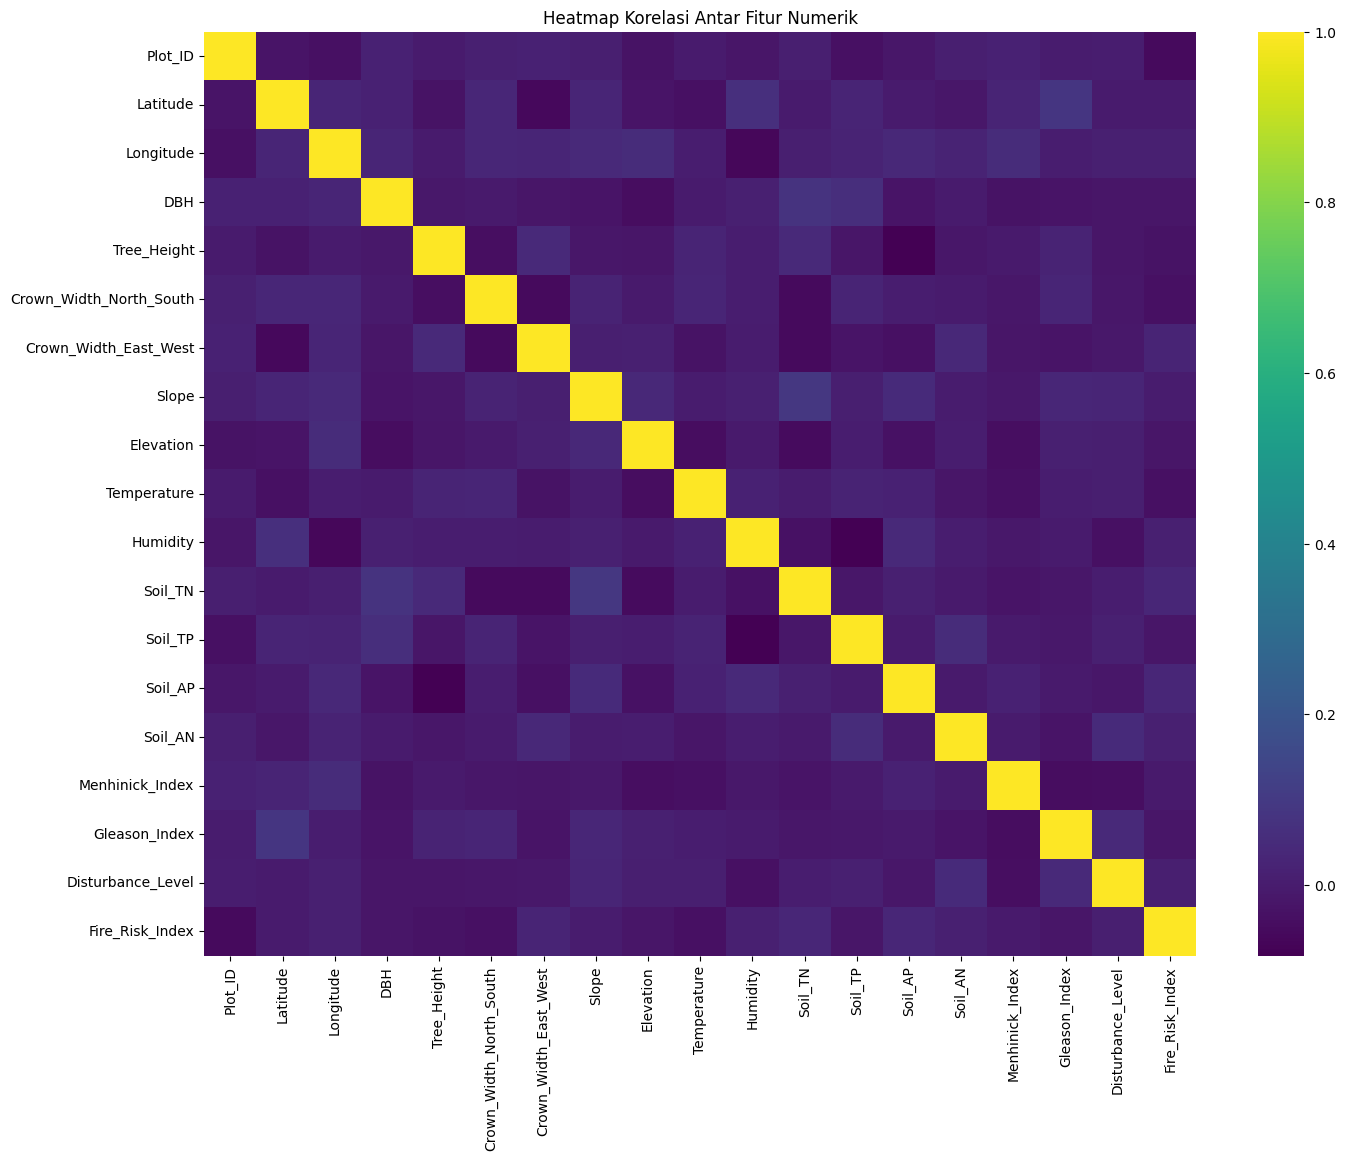

In [7]:
# ============================
# Heatmap Korelasi
# ============================

plt.figure(figsize=(16, 12))

# Ambil hanya kolom numerik
numeric_df = df.select_dtypes(include=['number'])

# (Opsional) kalau mau tetap drop Plot_ID juga:
# numeric_df = numeric_df.drop(columns=['Plot_ID'])

corr = numeric_df.corr()

sns.heatmap(corr, cmap='viridis', annot=False)
plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.show()


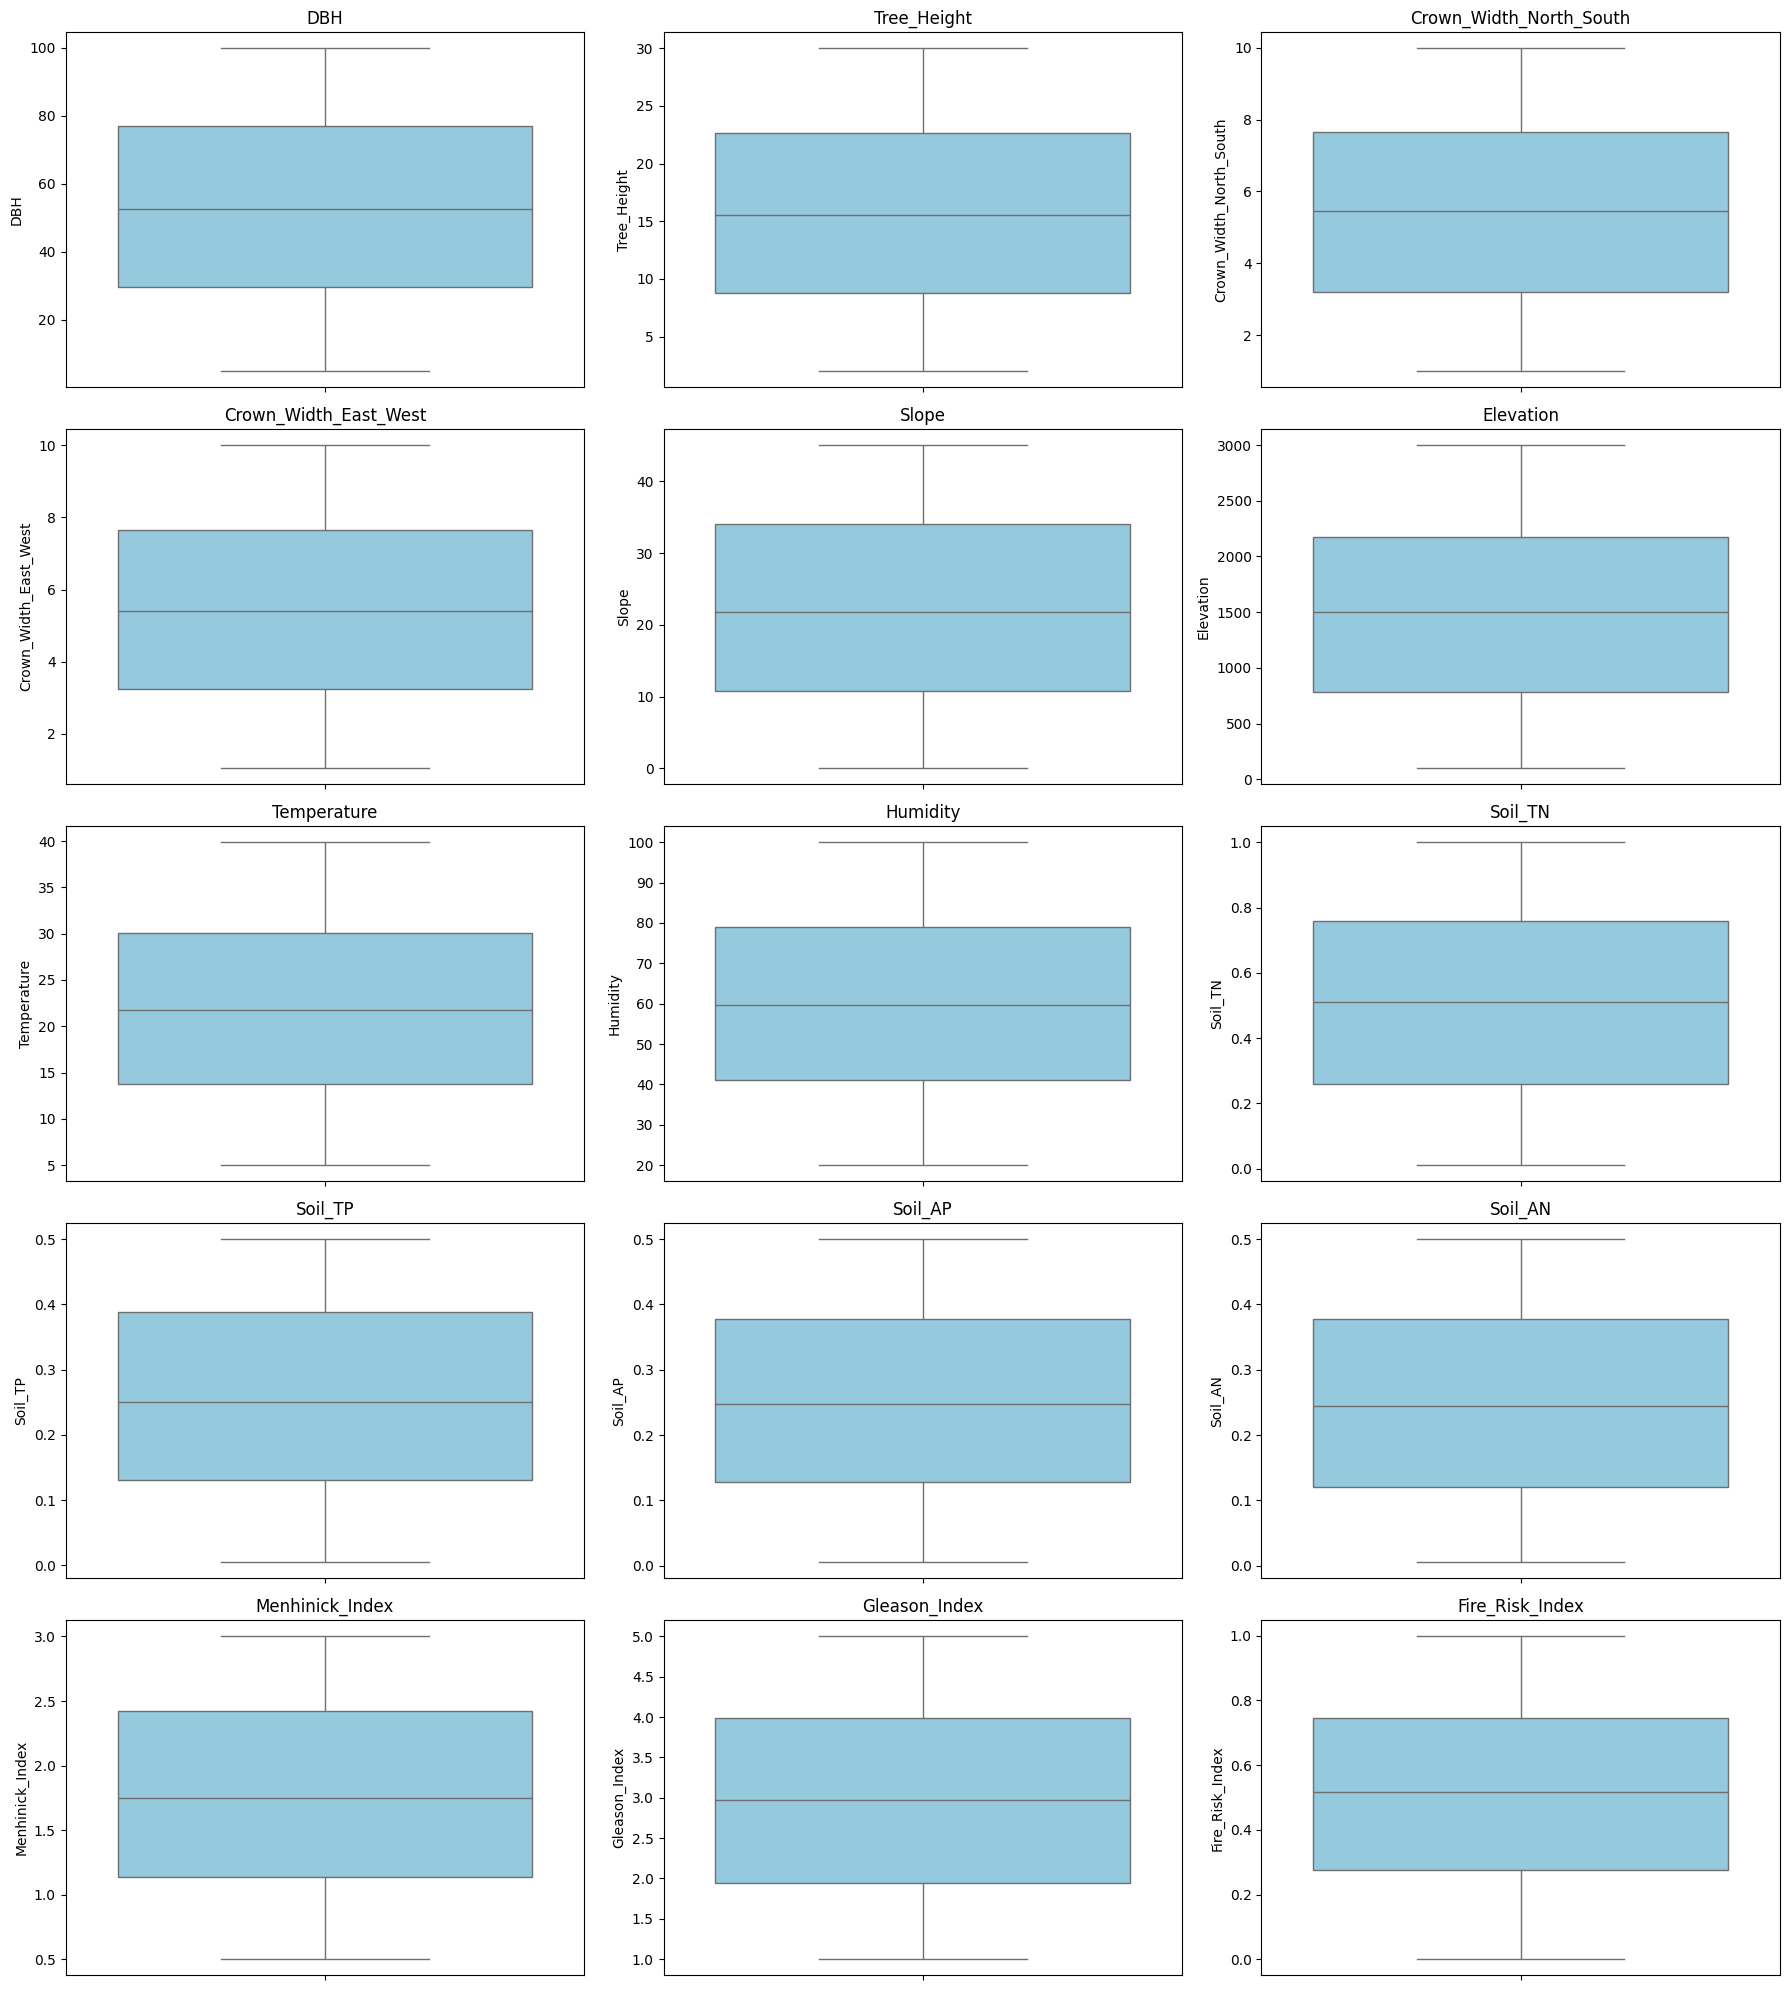

In [15]:
# ============================
# Boxplot Outlier Detection per Fitur
# ============================

numerical_columns = [
    'DBH', 'Tree_Height', 'Crown_Width_North_South', 'Crown_Width_East_West',
    'Slope', 'Elevation', 'Temperature', 'Humidity',
    'Soil_TN', 'Soil_TP', 'Soil_AP', 'Soil_AN',
    'Menhinick_Index', 'Gleason_Index', 'Fire_Risk_Index'
]

plt.figure(figsize=(18, 20))

# plot grid: 5 baris × 3 kolom
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()


C:\Users\Rahayu Febrianti\AppData\Local\Temp\ipykernel_1212\2325873769.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Health_Status', y='DBH', palette='viridis')


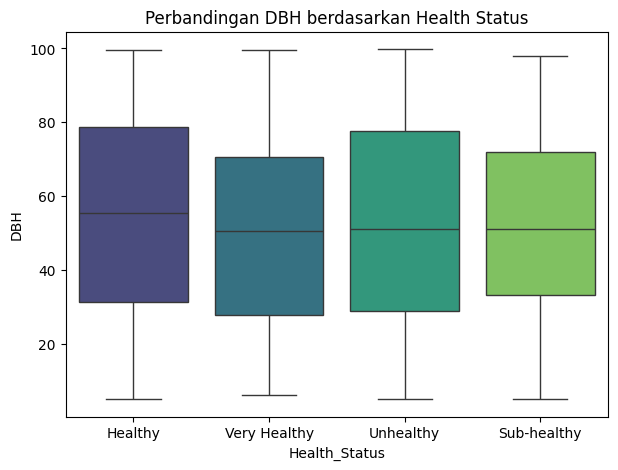

In [16]:
# ============================
# Perbandingan Fitur Berdasarkan Kelas
# ============================

plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='Health_Status', y='DBH', palette='viridis')
plt.title("Perbandingan DBH berdasarkan Health Status")
plt.show()


C:\Users\Rahayu Febrianti\AppData\Local\Temp\ipykernel_1212\3726721942.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Health_Status', y=feature, palette='viridis')


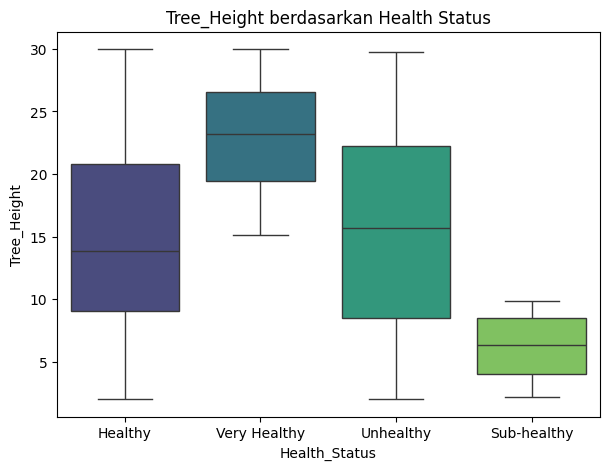

C:\Users\Rahayu Febrianti\AppData\Local\Temp\ipykernel_1212\3726721942.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Health_Status', y=feature, palette='viridis')


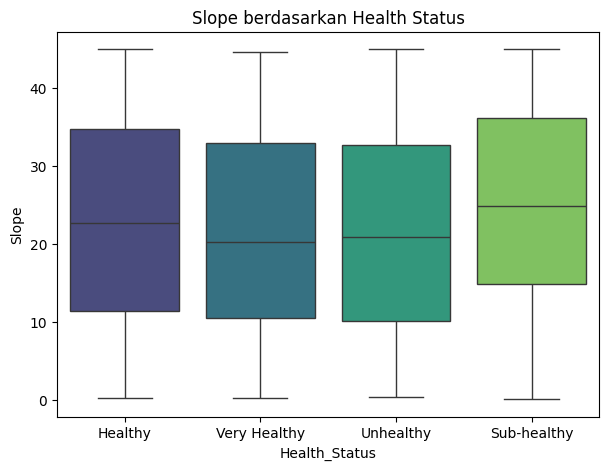

C:\Users\Rahayu Febrianti\AppData\Local\Temp\ipykernel_1212\3726721942.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Health_Status', y=feature, palette='viridis')


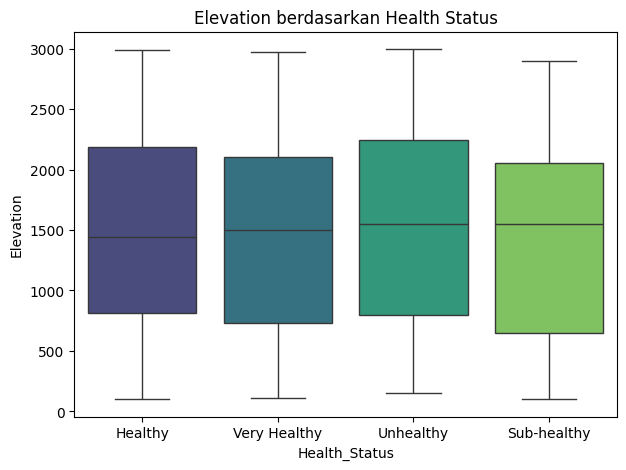

C:\Users\Rahayu Febrianti\AppData\Local\Temp\ipykernel_1212\3726721942.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Health_Status', y=feature, palette='viridis')


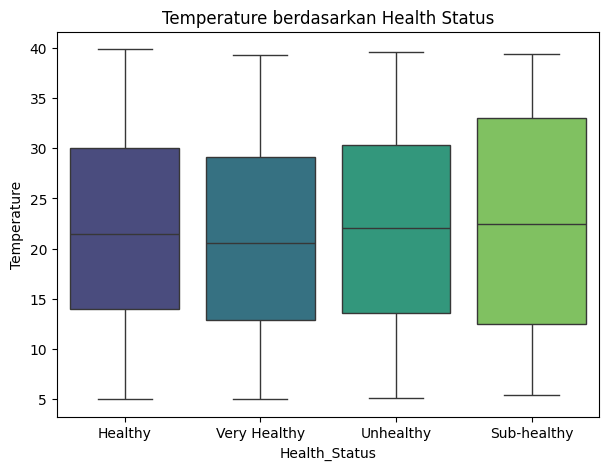

C:\Users\Rahayu Febrianti\AppData\Local\Temp\ipykernel_1212\3726721942.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Health_Status', y=feature, palette='viridis')


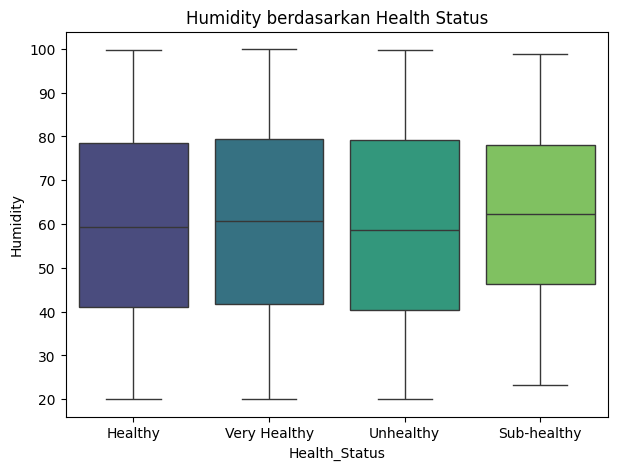

In [17]:
features_to_compare = ['Tree_Height', 'Slope', 'Elevation', 'Temperature', 'Humidity']

for feature in features_to_compare:
    plt.figure(figsize=(7,5))
    sns.boxplot(data=df, x='Health_Status', y=feature, palette='viridis')
    plt.title(f"{feature} berdasarkan Health Status")
    plt.show()


In [18]:
# ============================
# 4.1 Drop kolom yang tidak digunakan
# ============================

df_clean = df.drop(columns=['Plot_ID', 'Latitude', 'Longitude'])

print("Kolom setelah drop:")
print(df_clean.columns)


Kolom setelah drop:
Index(['DBH', 'Tree_Height', 'Crown_Width_North_South',
       'Crown_Width_East_West', 'Slope', 'Elevation', 'Temperature',
       'Humidity', 'Soil_TN', 'Soil_TP', 'Soil_AP', 'Soil_AN',
       'Menhinick_Index', 'Gleason_Index', 'Disturbance_Level',
       'Fire_Risk_Index', 'Health_Status'],
      dtype='object')


In [19]:
# ============================
# 4.2 Encoding target Health_Status
# ============================

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_clean['Health_Status'] = label_encoder.fit_transform(df_clean['Health_Status'])

# Melihat hasil encoding
print("Mapping Label:")
for i, cls in enumerate(label_encoder.classes_):
    print(f"{cls} → {i}")

df_clean.head()


Mapping Label:
Healthy → 0
Sub-healthy → 1
Unhealthy → 2
Very Healthy → 3


,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index,Health_Status
0,29.862040,20.835684,6.147963,4.542720,29.171563,212.518419,30.209377,93.086241,0.379904,0.268850,0.328882,0.487287,0.682938,2.998681,0.004402,0.812948,0
1,28.462986,24.307079,8.248891,5.260921,7.757386,641.640332,29.054905,62.028839,0.339583,0.073260,0.044616,0.013501,0.723696,3.986987,0.000330,0.678542,3
2,91.094185,9.013101,7.841448,8.690927,39.257755,2510.612835,8.351397,77.992822,0.184392,0.297665,0.124953,0.474088,2.129934,3.250667,0.472263,0.889075,0
3,28.706889,19.496475,2.385099,4.060039,27.590231,2323.628233,37.290034,54.883864,0.611194,0.160819,0.387971,0.187495,1.717352,1.333210,0.029294,0.449336,2
4,30.835224,18.008888,2.343245,8.826847,7.074175,1116.863805,24.896527,70.402766,0.481858,0.030913,0.266699,0.009995,2.476038,1.742321,0.974533,0.893890,2


In [20]:
print("\nDistribusi kelas setelah encoding:")
print(df_clean['Health_Status'].value_counts())



Distribusi kelas setelah encoding:
Health_Status
0    441
2    322
3    156
1     81
Name: count, dtype: int64


In [21]:
# ============================
# 4.4 Menentukan fitur (X) dan target (y)
# ============================

X = df_clean.drop(columns=['Health_Status'])
y = df_clean['Health_Status']

print("Shape X:", X.shape)
print("Shape y:", y.shape)


Shape X: (1000, 16)
Shape y: (1000,)


In [22]:
# ============================
# 5. Train-Test Split & Scaling
# ============================

# 5.1 Membagi data menjadi train (80%) dan test (20%)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% untuk test set
    random_state=42,         # agar hasil konsisten
    stratify=y               # menjaga distribusi kelas tetap seimbang
)

print("Ukuran X_train :", X_train.shape)
print("Ukuran X_test  :", X_test.shape)
print("Ukuran y_train :", y_train.shape)
print("Ukuran y_test  :", y_test.shape)


# 5.2 Feature Scaling dengan StandardScaler (WAJIB untuk KNN)

scaler = StandardScaler()

# Penting!!! Fit scaler hanya pada X_train saja (untuk menghindari data leakage)
X_train_scaled = scaler.fit_transform(X_train)

# Untuk X_test cukup transform saja
X_test_scaled = scaler.transform(X_test)

print("\nScaling selesai.")


Ukuran X_train : (800, 16)
Ukuran X_test  : (200, 16)
Ukuran y_train : (800,)
Ukuran y_test  : (200,)

Scaling selesai.


In [23]:
# ============================
# 6. Mencari Nilai K Optimal
# ============================

error_rates = []
k_values = range(1, 41)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    y_pred_k = knn.predict(X_test_scaled)
    
    # Error rate = rata-rata prediksi yang salah
    error = np.mean(y_pred_k != y_test)
    error_rates.append(error)

# Cek beberapa nilai awal
for k, err in list(zip(k_values, error_rates))[:10]:
    print(f"K = {k}, Error Rate = {err:.4f}")


K = 1, Error Rate = 0.4550
K = 2, Error Rate = 0.5250
K = 3, Error Rate = 0.4200
K = 4, Error Rate = 0.4550
K = 5, Error Rate = 0.4450
K = 6, Error Rate = 0.4200
K = 7, Error Rate = 0.4100
K = 8, Error Rate = 0.4150
K = 9, Error Rate = 0.3850
K = 10, Error Rate = 0.4200


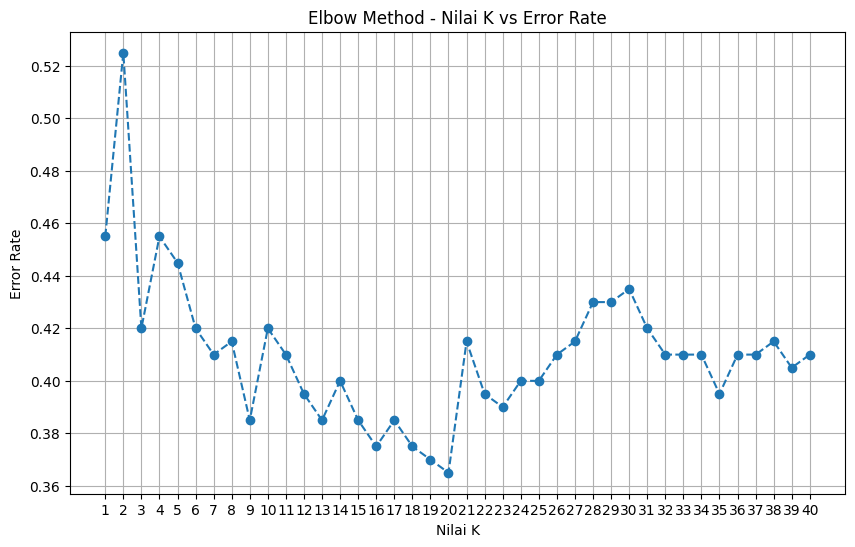

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed')
plt.title('Elbow Method - Nilai K vs Error Rate')
plt.xlabel('Nilai K')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [25]:
# Cari error terkecil
min_error = min(error_rates)
best_k = k_values[error_rates.index(min_error)]

print(f"Error terkecil: {min_error:.4f}")
print(f"Nilai K terbaik (berdasarkan error terkecil): {best_k}")


Error terkecil: 0.3650
Nilai K terbaik (berdasarkan error terkecil): 20


In [26]:
# ============================
# 7. Melatih Model KNN Final
# ============================

k_optimal = best_k  # dari tahap sebelumnya, yaitu 20

knn_final = KNeighborsClassifier(n_neighbors=k_optimal)
knn_final.fit(X_train_scaled, y_train)

# Prediksi pada data uji
y_pred = knn_final.predict(X_test_scaled)

print("Model KNN final berhasil dilatih dengan K =", k_optimal)


Model KNN final berhasil dilatih dengan K = 20


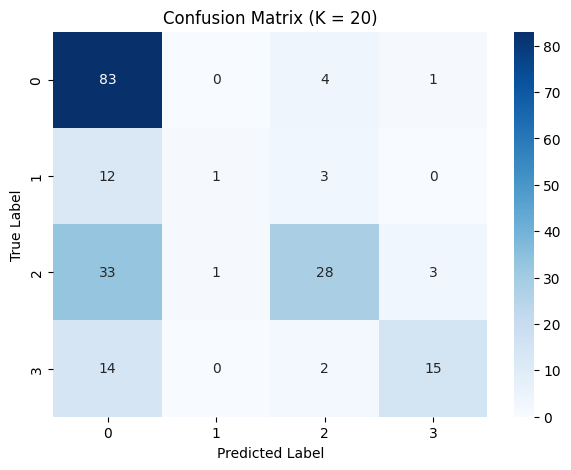

Confusion Matrix:
[[83  0  4  1]
 [12  1  3  0]
 [33  1 28  3]
 [14  0  2 15]]


In [27]:
# ============================
# Confusion Matrix
# ============================

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title(f'Confusion Matrix (K = {k_optimal})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Confusion Matrix:")
print(cm)


In [28]:
# ============================
# Classification Report
# ============================

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Hitung accuracy saja
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi Model KNN (K = {k_optimal}): {acc:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.94      0.72        88
           1       0.50      0.06      0.11        16
           2       0.76      0.43      0.55        65
           3       0.79      0.48      0.60        31

    accuracy                           0.64       200
   macro avg       0.66      0.48      0.50       200
weighted avg       0.67      0.64      0.60       200

Akurasi Model KNN (K = 20): 0.6350


In [29]:
# ============================
# 8. Prediksi Data Baru
# ============================

# Data dummy (harus mengikuti urutan fitur X)
data_baru = {
    'DBH': [40],
    'Tree_Height': [18],
    'Crown_Width_North_South': [5.2],
    'Crown_Width_East_West': [6.1],
    'Slope': [12],
    'Elevation': [850],
    'Temperature': [24],
    'Humidity': [70],
    'Soil_TN': [0.45],
    'Soil_TP': [0.22],
    'Soil_AP': [0.20],
    'Soil_AN': [0.28],
    'Menhinick_Index': [1.9],
    'Gleason_Index': [3.2],
    'Disturbance_Level': [0.3],   # ~ low disturbance
    'Fire_Risk_Index': [0.4]
}

df_baru = pd.DataFrame(data_baru)

print("Data Baru:")
display(df_baru)


Data Baru:


,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index
0,40,18,5.2,6.1,12,850,24,70,0.45,0.22,0.2,0.28,1.9,3.2,0.3,0.4


In [30]:
# Scaling data baru
df_baru_scaled = scaler.transform(df_baru)


In [31]:
# Prediksi
prediksi = knn_final.predict(df_baru_scaled)
prediksi


array([0])

In [32]:
# Mengubah angka prediksi menjadi label asli
hasil_label = label_encoder.inverse_transform(prediksi)
print("Hasil Prediksi Kesehatan Pohon:", hasil_label[0])


Hasil Prediksi Kesehatan Pohon: Healthy


In [33]:
import joblib

# Menyimpan model
joblib.dump(knn_final, "knn_model.pkl")

# Menyimpan scaler
joblib.dump(scaler, "scaler.pkl")

# Menyimpan label encoder
joblib.dump(label_encoder, "label_encoder.pkl")

print("Model, scaler, dan label encoder berhasil disimpan.")


Model, scaler, dan label encoder berhasil disimpan.
